In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

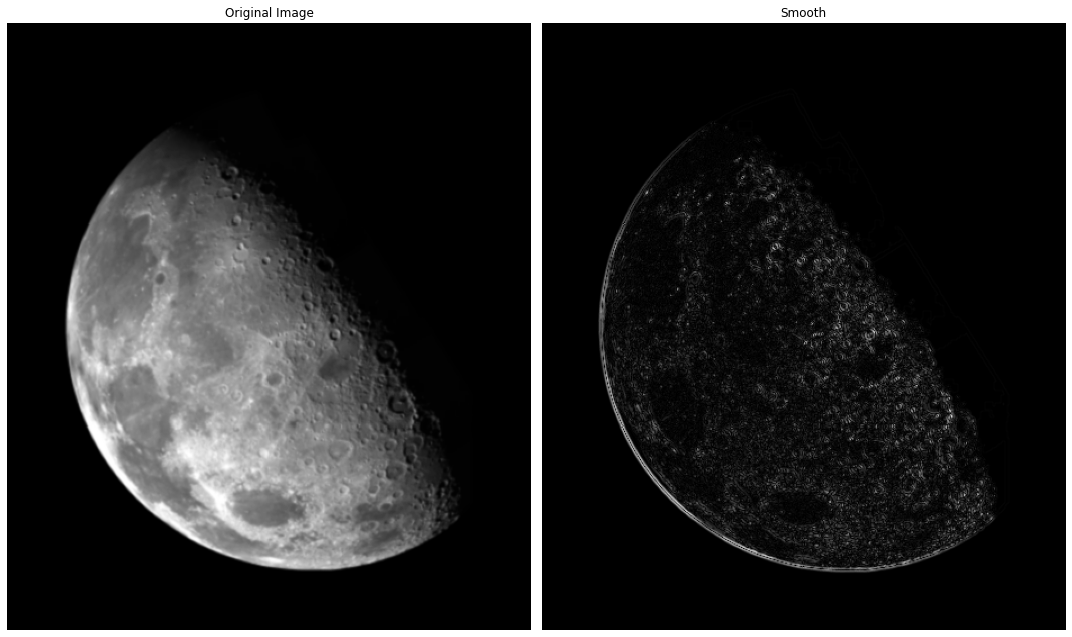

In [4]:
img_ex1 = cv2.imread("Figuras_Aula6/Fig0338a.tif", cv2.IMREAD_GRAYSCALE)
(h, w) = img_ex1.shape

m = 3
d= int((m-1)/2)
kernel = np.array([[0,1,0],[1,-4,1],[0,1,0]],dtype="int16")

img_filter=np.zeros((h,w),dtype = "uint8")

for i in range(d,h-d):
    for j in range (d,w-d):
        secao_img = img_ex1[i-d:i+d+1,j-d:j+d+1]

        product =kernel*secao_img
        sum = product.sum()
        img_filter[i,j]= abs(sum).astype("uint8")
        

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(img_ex1, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_filter, cmap='gray')
plt.title('Smooth')
plt.axis('off')


plt.tight_layout()
plt.show()

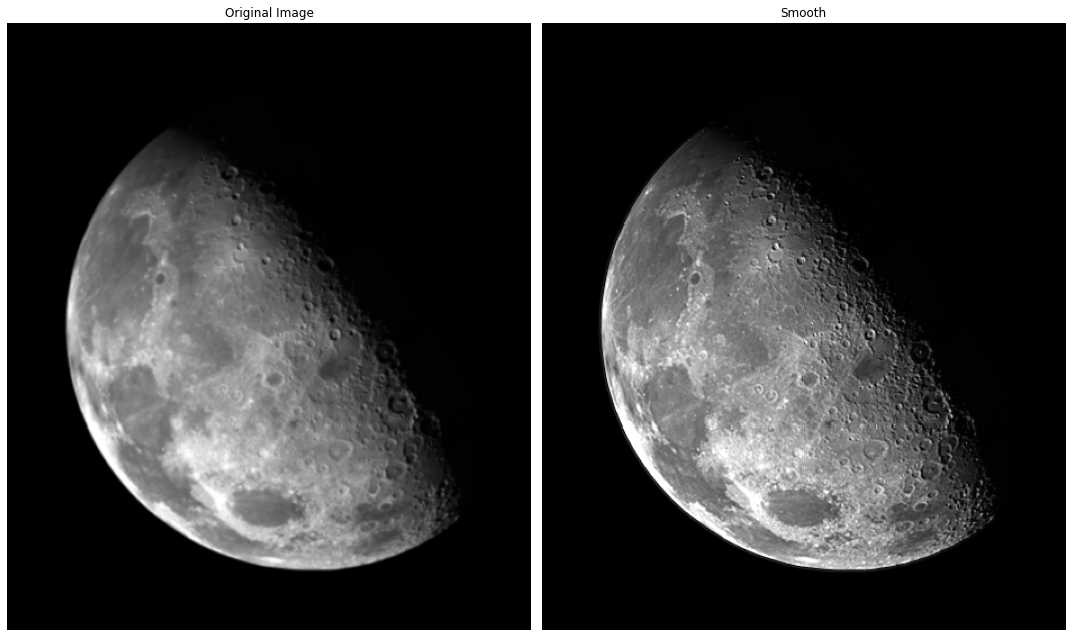

In [5]:
img_ex1 = cv2.imread("Figuras_Aula6/Fig0338a.tif", cv2.IMREAD_GRAYSCALE)
(h, w) = img_ex1.shape

m = 3
d= int((m-1)/2)
kernel = np.array([[0,1,0],[1,-5,1],[0,1,0]],dtype="int16")

#img_filter_32=np.zeros((h,w),dtype = "uint32")
img_filter=np.zeros((h,w),dtype = "uint8")

for i in range(d,h-d):
    for j in range (d,w-d):
        secao_img = img_ex1[i-d:i+d+1,j-d:j+d+1]

        product =kernel*secao_img
        sum = product.sum()
        img_filter[i,j]=np.clip(abs(sum),0,255).astype(np.uint8)
        

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(img_ex1, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_filter, cmap='gray')
plt.title('Smooth')
plt.axis('off')


plt.tight_layout()
plt.show()

In [6]:
img_Panda = cv2.imread("Figuras/Panda_Padrao_u8.bmp", cv2.IMREAD_GRAYSCALE)
img_Fundo1 = cv2.imread("Figuras/Onde_esta_Panda1_U8.bmp", cv2.IMREAD_GRAYSCALE)
(m,n) = img_Panda.shape
(h,w) = img_Fundo1.shape

d2= int((n-1)/2)
d1= int((m-1)/2)

s_min =200000
i_min = 0
j_min = 0
#img_filter_32=np.zeros((h,w),dtype = "uint32")

img_Erros=np.ones((h,w),dtype = "int32")*s_min

for i in range(d1,h-d1):
    for j in range (d2,w-d2):
        secao_img = img_Fundo1[i-d1:i+d1+1,j-d2:j+d2+1]

        erro_secao = abs(secao_img.astype(np.int32)-img_Panda.astype(np.int32))
        img_Erros[i,j]=erro_secao.sum()
        if(img_Erros[i,j]<s_min):
            i_min=i
            j_min=j
            s_min=img_Erros[i,j]

print("Pos_X = ",i_min)
print("Pos_Y = ",j_min)
print("S_min = ",s_min)

Pos_X =  182
Pos_Y =  473
S_min =  29795
